# <center> A regression analysis on the impacts of musical characteristics on songs popularity  </center>
##### <center> Nguyen Anh Khoa, Abel van Dijk </center>
##### <center> Radboud University, Faculty of Social Sciences </center>

# <center> Abstract </center>
Nowadays, music is a part of life which provides people with various benefits. This study is conducted to further investigate some musical characteristics to understand their impacts on the popularity of a track. A multiple linear regression is carried out in this study to explore the linear association between these characteristics and the popularity score of a track rated by audience. After a carefull consideration, some musical attributes such as acousticness, danceability, energy, instrumentalness, loudness, speechiness and valence are chosen in our research. Studying these features helps us to have a more insightful understanding about music, thus, contribute to produce more high-quality tracks in music market.

# <center> Introduction </center>

Music plays a vital role in our modern life. It has been shown to bring benefits to human both physically and mentally. These days, there is an increment in the demand of listening to music as a way to improve mood, relieve stress and facilitate entertainment desires. This leads to the explosion of different songs with different genres in the music market. As a result, it now becomes more and more difficult to choose the right song which is suitable for an individual musical taste. One of the most popular factors used to select such a suitable track to listen is to rely on its popularity rating score. 

Understanding this demand of the society, this study is going to 
explore some potential influential factors of the song popularity, which can provide a scientific basis for people to choose their desired track based on its popularity rating. In specific, we are going to answer the following research question: “Is there an evidence that musical characteristics is associated with the popularity of songs ?” 

In this study, musical characteristics are independent variables including acousticness, danceability, energy, instrumentalness, loudness, speechiness, and valence. These characteristics are selected in this study since they are among the most popular elements of a track. In addition, Interiano and her colleagues conducted a study to research these characteristics. They concluded that these elements are indeed related to the musical trends of the top charts (Interiano et al., 2018). Thus, we want to focus on them to explore their linear association with the song popularity

### **Hypothesis**
- $H_0$: There is no relationship between musical features including acousticness, danceability, energy, instrumentalness, loudness, speechiness, valence, and song popularity.

- $H_A$: There is a linear relationship between musical features including acousticness, danceability, energy, instrumentalness, loudness, speechiness, valence, and song popularity.

For every explanatory variable, we define hypothesis as the following: 
- $\beta_i = 0$, if the variable is not included in the model
- $\beta_i \neq 0$, if the variable is included in the model 

# <center> Data Exploration </center> 

### Data Overview
In this study, we are going to use Spotify Track Database on [Kaggle](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db). Initially, it is crucial to have a general look at the structure of the data. Here, the data consists of 228159 entries and 18 columns of which 11 columns are numerical values. In specific, as you can see below, we have 7 column which is object (categorical data), 9 columns which are of float data type (numerical data) and 2 columns which are of integer data type (numerical data). 

In [163]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
sns.set_style('whitegrid')

# Importing the dataset
data = pd.read_csv("SpotifyFeatures.csv")
# Initial look at the dataset
print("The data has {} rows and {} columns".format(data.shape[0], data.shape[1]))
print("The data has the following types: \n" + "{}".format(data.dtypes))

The data has 228159 rows and 18 columns
The data has the following types: 
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


In the scope of this study, we only focus on numerical attributes and get rid of the rest. Now, it is necessary to have a general look at these numerical attributes. In addition, it is important to check missing values in the dataset to decide whether we need to perform some techniques to take care of missing data. 

According to the below table and plot, we can verify that there are no missing values in our data which is a good sign for this study. This means that we do not have to implement any techniques to handle missing data. If we have a closer look at the table, there are some interesting figures in the dataset. First of all, it is noticeable that most of attributes have values from 0 to 1. Furthermore, there are attributes whose values are much more larger than others. For example, values for *duration_ms* explanatory variables are about 5 times larger than the rest. *Loudness* is the only variable which contain negative values since it is measured in decibel unit (dB). Typically, it is necessary to perform feature scailing due to variation in the scale of values in the data. However, since this study concentrates on linear regression analysis, all these characteristics do not influence final findings significantly. 

In [164]:
# Summary of the dataset
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,228159.000000,228159.000000,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,44.209130,0.351200,0.554198,2.366092e+05,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795
std,17.276599,0.351385,0.183949,1.166787e+05,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397
min,0.000000,0.000001,0.056900,1.550900e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,33.000000,0.030900,0.437000,1.862530e+05,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000
50%,47.000000,0.205000,0.570000,2.211730e+05,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000
75%,57.000000,0.689000,0.690000,2.648400e+05,0.793000,0.023400,0.263000,-5.415000,0.109000,138.887000,0.643000
max,100.000000,0.996000,0.987000,5.552917e+06,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000


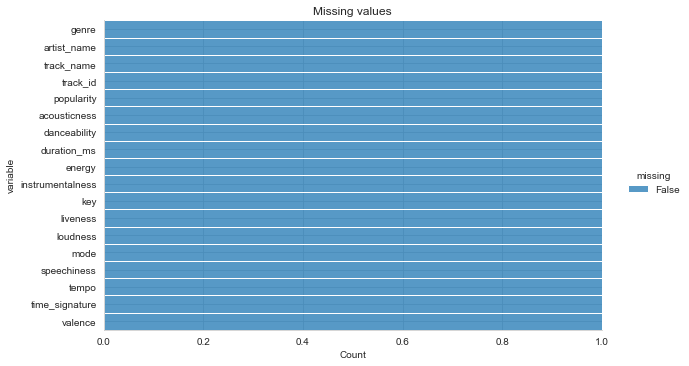

In [165]:
# Check for missing values
sns.displot(
    data= data.isna().melt(value_name="missing"),
    y= "variable",
    hue= "missing",
    multiple= "fill",
    aspect= 1.75
)
plt.title("Missing values")
plt.show()

In this study, we also want to get rid of duplicated values in the dataset. This makes the data become clean and concise before applying the regression model. As displayed below, it is clear that there are no duplicates in the data which means we do not have to perform data removal process. 

In [166]:
print("There are {} duplicates in the data".format(data.duplicated().sum()))

There are 0 duplicates in the data


### Response variable
Since the purpose of the study is to find the linear association between musical characteristics and the popularity of songs, the response variable here is *song_popularity*. The estimation is a continous variable representing for the popularity rating score collected from users on a scale of 100. The distribution of the response variable is shown in the plot below. Although the curve in probability plot does not perfectly fit the line, it still follows the trend and the shape of the line to some extent. Thus, based on the histogram and probability plot, we can verify that the response variable is approximately normal distributed which means that we do not have to make any transformation for the data. 

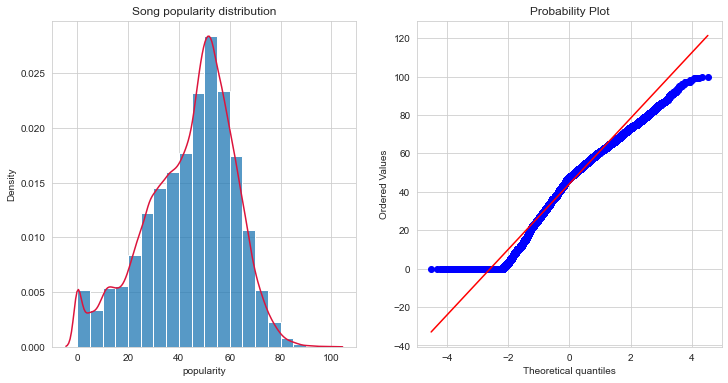

In [167]:
# Check normality of popularity
_, ax = plt.subplots(1, 2, figsize= (12, 6))
axe = sns.histplot(x= data['popularity'], bins = 20, ax= ax[0], kde = False, stat = 'density')
sns.kdeplot(data['popularity'], ax= axe, color= 'crimson')
ax[0].set_title("Song popularity distribution")
probplot(data["popularity"], fit= True, plot= ax[1])
ax[1].set_title("Probability Plot")
plt.show()

### Explanatory variables
The data has 13 independent variables corresponding to 13 musical characteristics which could have potential influence on the song popularity. However, as mentioned at the beginning of this research, we are going to mainly concentrate on 7 characteristics including acousticness, danceability, energy, instrumentalness, loudness, speechiness, and valence. Here are the description of these factors in details: 

* ***Acousticness*** is a continous numerical variable representing for the confidence level of a track whether it is an acoustic track. The range of this variable is from 0.0 to 1.0

* ***Danceability*** is also a continous numerical variable describing how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. The value for this variable is measured on the scale of 1.0

* ***Energy*** is measured from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. This means that a track with high level of energy is typically fast, energetic, loud and noisy. 

* ***Instrumentalness*** is a continous numerical variable indicating the confidence level of whether a track contains no vocals in a range between 0.0 and 1.0. In other words,the closer to 1.0 a track is, the higher confidence of no vocals it is. 

* ***Loudness***, however, is a discrete numerical variable. It refers to the overall loudness of a track in decibels (dB).

* The continous numerical variable ***speechiness*** illustrates presence rate of spoken words. It is measured from 0.0 to 1.0.

* Finally, ***valence***, a continous numerical variable, indicates musical positiveness of a track. In specific, tracks with high valence sound more positive (e.g. happy, cheerful), while tracks with low valence sound more negative (e.g. sad, depressed, angry). It is also measured from 0.0 to 1.0.


Before going further, it is necessary to visualize the distribution of these variables. In the following plots, we can observe some interesting distribution of these musical characteristics. In general, it is recognizable that most of the distribution are skewed. To be specific, instrumentalness and speechiness are right-skewed distribution while loudness follows a left-skewed pattern. Furthermore, danceability is the only feature which follow a normal distribution. In contrast, acousticness and tempo indicates multimodal distribution. Finally, the remaining features including energy and valence do not actually show any special distribution. 

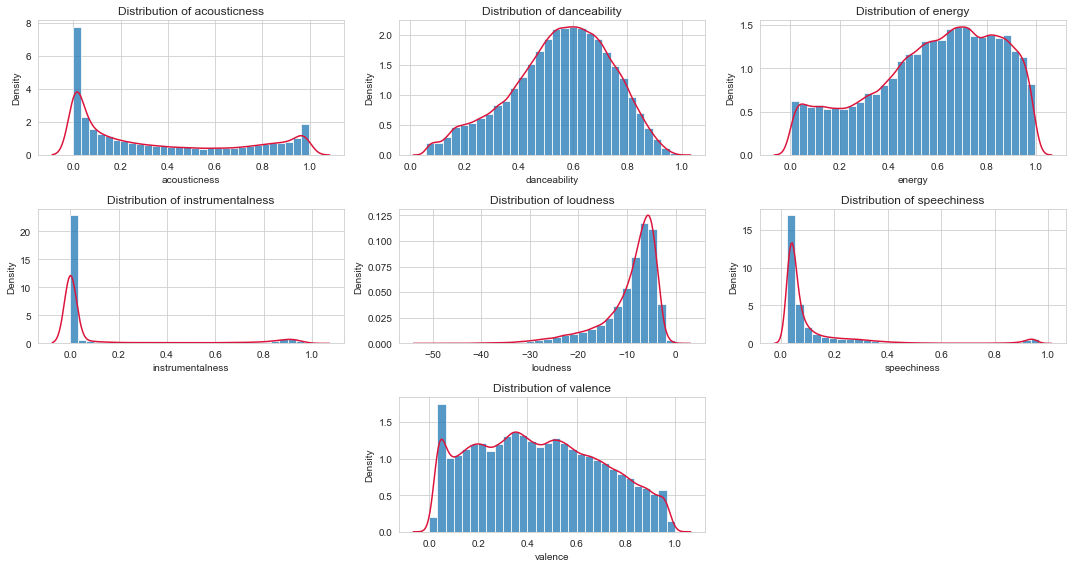

In [168]:
# Visualizing the distribution of musical characteristics
_, ax = plt.subplots(3, 3, figsize= (15, 8))
variables = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', None, 'valence', None]
for i in range(len(variables)):
    if (variables[i] == None):
        ax[i // 3, i % 3].axis('off')
        continue
    axe = sns.histplot(x = data[variables[i]], bins = 30, ax= ax[i // 3, i % 3], kde = False, stat = 'density')
    sns.kdeplot(data[variables[i]], ax= axe, color= 'crimson')
    ax[i // 3, i % 3].set_title("Distribution of {}".format(variables[i]))
plt.tight_layout()

# <center> Fitting Model </center>

### Bivariate Analysis
Initially, it is important to explore potential multicollinearity between selected variables before fitting the model. The reason is that the regression model will be difficult to interpret and unreliable in case there are many two highly correlated variables in the model. Since there are various explanatory variables and entries in this study, it is inadequate to detect correlation through scatter plots. After careful consideration, we decide to choose a heatmap to visualize the correlation matrix which makes the correlation become more readable and perceptible. 

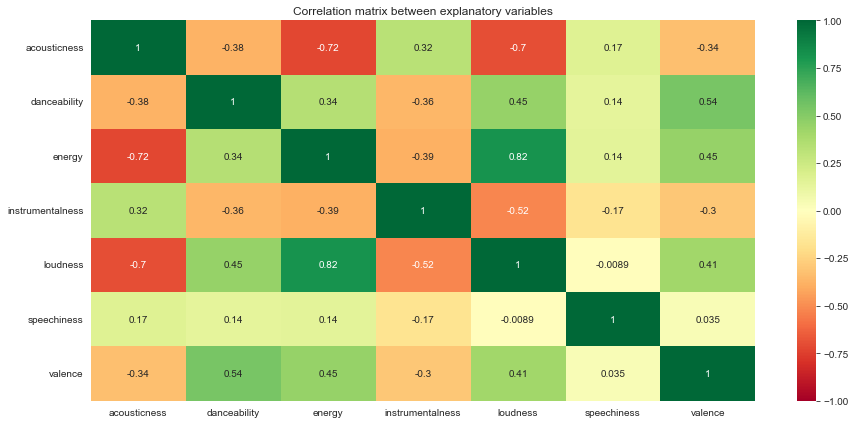

In [169]:
selected_data = data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'valence']]
corr = selected_data.corr()
plt.figure(figsize= (13, 6))
sns.heatmap(corr, annot= True, cmap= 'RdYlGn', vmax= 1.0, vmin= -1.0)
plt.title("Correlation matrix between explanatory variables")
plt.tight_layout()

In the above correlation matrix, overall, there are not too many independent variables with high correlation values. There are 3 values in the correlation matrix that is worth worrying. In specific, we have three high correlation:
- The correlation between energy and acousticness indicated by the value of -0.72
- The correlation between loudness and acousticness with -0.7
- The correlation between loudness and energy described by the value of 0.82

Typically, the approach for this problem is to use a Principle Component Regression (PCR) which is based on the Principle Component Analysis (PCA) technique. However, as stated at the beginning, this study aims to research the multiple linear regression, so we are going to keep all variables as they are along with a description about this issue later. 

### Multiple Linear Regression

Now, after the process of exploring and cleaning the data, we proceed to build a regression model. The considered independent variables are acousticness, danceability, energy, instrumentalness, tempo, loudness, speechiness and valence. In this research, we decide to use backward selection method. The chosen criteria for running this method is p-value which is proved to be the most effective criterion for statistical significant of independent variables. Our study selects $\alpha = 0.05$ as a significant level. Here, after fitting the lienar model on the dataset, it is obvious that there are not any variables with high p-value. All considered explanatory variables have p-value below the chosen significant level ($p < \alpha$) which means that all these musical characteristics do have significant statistical impacts on the popularity of a track. The details of interpretation of this will be addressed in an insightful manner in the next section. 

In [170]:
string = "popularity ~ acousticness + danceability + energy + instrumentalness + loudness + speechiness + valence"
model = sm.formula.ols(formula= string, data= data)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                 1.214e+04
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:42:53   Log-Likelihood:            -9.3774e+05
No. Observations:              228159   AIC:                         1.875e+06
Df Residuals:                  228151   BIC:                         1.876e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           59.2965      0.281  

### Checking model assumptions

Since this research uses multiple linear regression model to study musical characteristics, it is obligatory for the model to follow these four assumptions:
1. The variability of the residuals is nearly constant.
2. The residuals of the model are nearly normal.
3. The residuals are independent.
4. Each variable is linearly related to the outcome.

Simple and effective plots can be used to check each of these assumptions. In this study, we are going to use histograms, scatter plots and QQ plots to verify the validity of our model. 

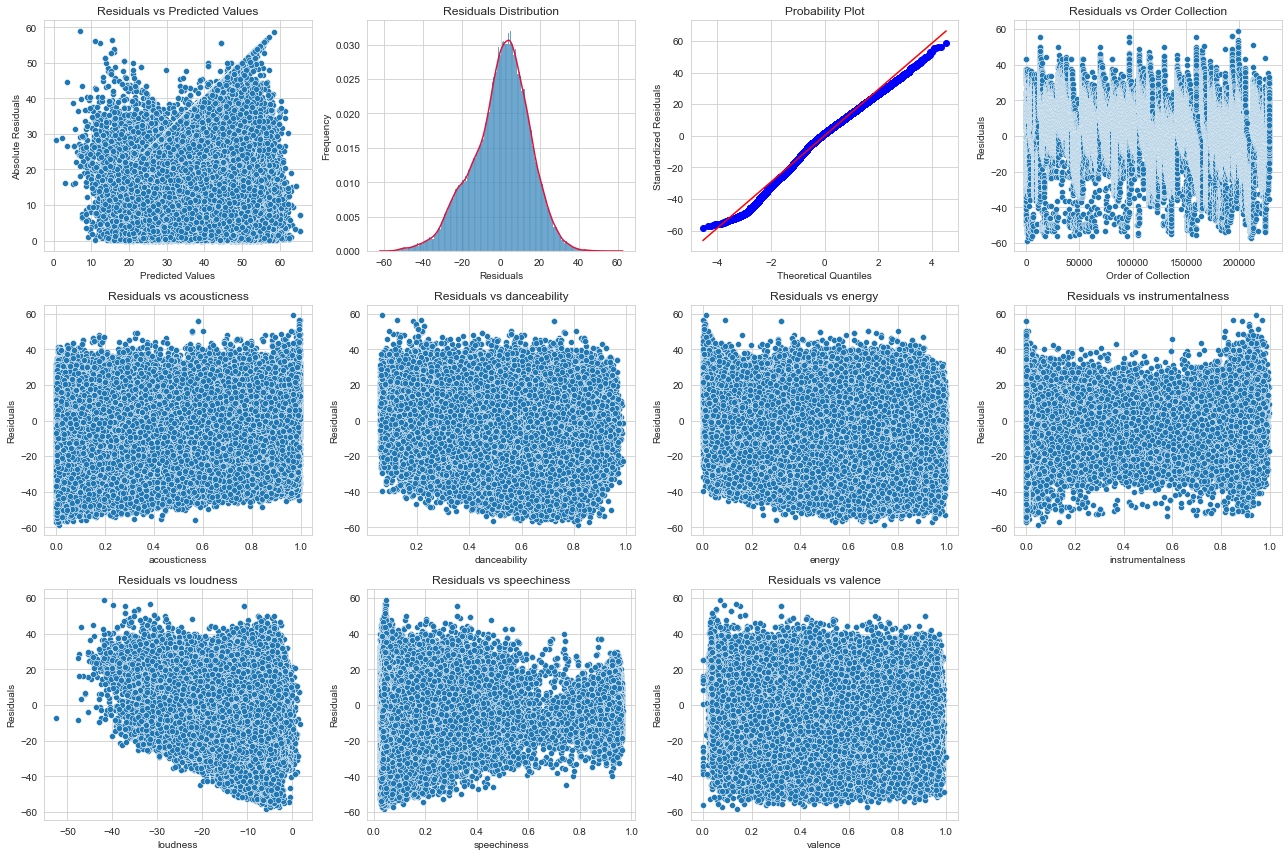

In [171]:
y_pred = results.predict()
residual = data['popularity'] - y_pred

_, ax = plt.subplots(3,4, figsize=(18,12))

sns.scatterplot(x= y_pred, y= np.abs(residual), ax= ax[0][0])
ax[0][0].set_title("Residuals vs Predicted Values")
ax[0][0].set_xlabel("Predicted Values")
ax[0][0].set_ylabel("Absolute Residuals")

axe = sns.histplot(x= residual, ax= ax[0][1], kde = False, stat = 'density')
sns.kdeplot(residual, ax= axe, color= 'crimson')
ax[0][1].set_title("Residuals Distribution")
ax[0][1].set_xlabel("Residuals")
ax[0][1].set_ylabel("Frequency")

probplot(residual, dist= "norm", plot= ax[0][2])
ax[0][2].set_xlabel("Theoretical Quantiles")
ax[0][2].set_ylabel("Standardized Residuals")

sns.scatterplot(x= np.arange(len(residual)), y= residual, ax= ax[0][3])
ax[0][3].set_title("Residuals vs Order Collection")
ax[0][3].set_xlabel("Order of Collection")
ax[0][3].set_ylabel("Residuals")

ax[2][3].axis('off')
for i in range(len(selected_data.columns)):
    sns.scatterplot(x= selected_data.iloc[:, i], y= residual, ax= ax[i // 4 + 1, i % 4])
    ax[i // 4 + 1, i % 4].set_title("Residuals vs {}".format(selected_data.columns[i]))
    ax[i // 4 + 1, i % 4].set_xlabel(selected_data.columns[i])
    ax[i // 4 + 1, i % 4].set_ylabel("Residuals")

plt.tight_layout()


In the first plot on the first line, in overall, it is evident that the variability of the residuals is nearly constant. In the histogram, the data is approximately normal distributed. In addition, the probability plot suggests that the data fits quite well to the straight line. This means that through the histogram and probability plot, we can verify that the residuals of the model are nearly normal. The plot residual vs order collection also shows the independence of the residuals since the data is scattered randomly and does not follow any specific trend. Finally, in the remaining plots, we can see a linear relationship between each explanatory variable and the outcome. Thus, in summary, we can conclude that the model does not violate any assumptions which suggests that the model is valid and reliable. 

# <center> Results </center>
In the previous section, we have successfully applied a multiple linear regression model on the dataset and obtained some interesting results. In this section, we are going to have a further look at these findings and interpret them carefully. First of all, let us have a look at the $R^2$ score, in our model, the $R^2$ score is 0.271. At a first glance, it can be seen that the model shows a very weak linear relationship between explanatory variables and response variable. However, since the data is collected in a professional domain instead of a scientific and academic one, it creates a high chance of extreme variability in the dataset. Thus, it is acceptable to consider that a $R^2$ score of 0.271 is sufficient to demonstrate a linear association. 

Next, we are going to formulate an equation to further investigate the findings. From the obtained results above, we can derive a linear equation for our model as the following: 
\begin{align*}
    popularity = 59.30 - 12.37 \cdot acousticness + 17.63 \cdot danceability - 10.37 \cdot energy -2.93 \cdot instrumentalness + 0.89 \cdot loudness -14.64 \cdot speechiness -8.87 \cdot valence
\end{align*}

From the above equation, the intercept 59.30 illustrates that the mean of the song popularity is 59.30 when all of the musical attributes are set to 0. In practice, this is almost impossible due to the fact that all songs should have at least one of the mentioned musical characteristics. Thus, the intercept here should only be interpreted as a theoretical value. 

As for the slopes in the equation, they suggest the rate of influence on song popularity of associated musical characteristics. In general, danceability and loudness have positive impacts on the popularity score while the remaining characteristics tend to decreases a track popularity. Specifically, we have a slope of 17.63 indicates that an increase of 0.1 in the dance suitability level of a track results in an increase of 1.763 score in its popularity rating. In addition, 
a rise of 1 dB in the loudness of a track also increases the popularity score by 0.89 points. In contrast, acousticness, energy and speechiness are the 3 musical characteristics which have strong negative influence on the popularity score. An additional 0.1 in acousticness confidence level, energy level and presence rate of spoken words results in an decrease of 1.237, 1.037, 1.464 in the popularity, respectively. Finally, instrumentalness and valence also negatively affect the popularity of a track but weaker than acousticness, energy and speechiness. The slope of -2.93 indicates that an increase of 0.1 in the level of instrumentalness decreases a track popularity by 0.293 points. The slope of -8.87 also represents for a decrease of 0.887 in the popularity score associated with an increase of 0.1 in the musical positiveness level of a track. 

In the bivariate analysis we conducted above, there are 3 high correlation between all these explanatory variables. Thus, we also want to report them in this section to have the most comprehensive look at the results. As stated in previous section, we have high correlation between energy and acousticness, loudness and acousticness, loudness and energy. In general, these bivariate correlation will affect the interpretability of the findings to some extent. In specific, a decrease in energy can result in a decrease in acousticness level of a track, with the correlation rate of 0.72. Similarly, a decrease in loudness also leads to a decrease in acousticness level with rate of 0.7. Finally, if loudness of a track increases, the energy level also increases with correlation rate of 0.82. 

# <center> Conclusion </center>
In this study, we have conducted a regression analysis to find the answer for the question whether there is a linear association between musical characteristics and song popularity. During the data exploration process, we provide some visualizations of the data used for this study and verify that there is no need to perform any transformation on the dataset. In the model and results parts, we chose to use backward selection method to select the most significant features for the regression model, validate the model and presented some interesting findings. 

In summary, it is evident to conclude that musical characteristics indeed have a linear association with the popularity of a track. In addition, our results also indicates that all considered musical characteristics including acousticness, danceability, energy, instrumentalness, loudness, speechiness and valence were found to have significant statistical impacts on the popularity of the song. While danceability and loudness have a positive influence on the popularity, the rest appears to have a negative pattern. Having these findings, producers and composers can have a scientific evidence to produce more viral tracks while audience can have a source to choose their favorite track more properly. 


# <center> Limitations </center>

It is the fact that data used in this study is unbalanced and extremely varied. This makes the $R^2$ score for the model is not really high. One of the most straightforward for this issue is to apply undersampling technique. This method allows us to balance the ratio of important and unimportant dependent variable values, which helps the model to see much more values that are taken into consideration. For this dataset, we think that it is feasible to apply this approach before fitting the model. Another limitation of this study is that there are several highly correlated coupled variables. As mentioned in the bivariate analysis part, a Principle Component Regression would address this issue more efficiently. This type of regression makes use of Principle Component Analysis (PCA) which is the process of computing the principal components and using them to perform a change of basis on the data. These solutions can further improve this study. 

# <center> Reference </center>

Interiano, Myra & Kazemi, Kamyar & Wang, Lijia & Yang, Jienian & Yu, Zhaoxia & Komarova, Natalia. (2018). Musical trends and predictability of success in contemporary songs in and out of the top charts. Royal Society Open Science. 5. 171274. 10.1098/rsos.171274. 